### **Implementing a Basic Neural Network**

**Dataset source**: https://www.kaggle.com/shrutimechlearn/churn-modelling

**About dataset**: This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

**Problem Statement**: Predict wether the customer is exited from the organization or not.

In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

In [51]:
data = pd.read_csv("../datasets/Churn_Modelling.csv")
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [52]:
# Unecessary columns
data.drop(['RowNumber', 'CustomerId' , 'Surname'] , axis = 1 , inplace = True)

In [53]:
# Check if there are null values in the dataset
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [54]:
# Check for object datatypes
data.info()
# number of records and datatypes of the columns
# objects formats need to be converted into numerical type to create a predictive model 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [55]:
# Label encode Object Datatypes 

data_types_dict = dict(data.dtypes)
# Keep track Mappings Column name to LabelEncoders
Label_encoder_collection = {}
for col_name , data_type in data_types_dict.items():
    if data_type == 'object':
        Le = LabelEncoder()
        data[col_name] = Le.fit_transform(data[col_name])
        Label_encoder_collection[col_name] = Le 

In [56]:
# Checking the dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [57]:
# Split the target column from the data
X = data.iloc[: , :-1].values.astype(np.float32) 
Y = data.iloc[: , -1].values.astype(int) # labels

In [58]:
# Split these two sets into training and testing sets (80% train and 20% test)
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [59]:
# Basic architecture to build the neural network

# Start the model with sequential object
model = tf.keras.models.Sequential()
# It's used to connect all the layers

# Next add a input object and specify the dimension you want to pass in
model.add(tf.keras.Input(shape=(10,)))
# the dimension should be the number of columns, in this case is 10 columns
# in your dataset in case of predictive modeling

# Add the neurons of 1st layer using dense object
model.add(tf.keras.layers.Dense(32))

# 2nd layer using dense object
model.add(tf.keras.layers.Dense(32))

# Final Sigmoid layer to predict a binary classification (0/1)
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# print summary to understand the neural network flow created
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                352       
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (5.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
# Create the optimizer and compile the model
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [61]:
# Train the model
history = model.fit(Xtrain , Ytrain , validation_data=(Xtest , Ytest) , epochs=20)

Epoch 1/20


250/250 [==============================] - 2s 3ms/step - loss: 572.0802 - accuracy: 0.6693 - val_loss: 417.2092 - val_accuracy: 0.7675
Epoch 2/20
250/250 [==============================] - 0s 2ms/step - loss: 370.6407 - accuracy: 0.6709 - val_loss: 561.5042 - val_accuracy: 0.5900
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 304.7428 - accuracy: 0.6714 - val_loss: 203.1359 - val_accuracy: 0.7000
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 241.3291 - accuracy: 0.6808 - val_loss: 109.2472 - val_accuracy: 0.4485
Epoch 5/20
250/250 [==============================] - 0s 2ms/step - loss: 274.9037 - accuracy: 0.6786 - val_loss: 152.3869 - val_accuracy: 0.6970
Epoch 6/20
250/250 [==============================] - 0s 2ms/step - loss: 352.9692 - accuracy: 0.6714 - val_loss: 621.0126 - val_accuracy: 0.4530
Epoch 7/20
250/250 [==============================] - 1s 2ms/step - loss: 257.4142 - accuracy: 0.6774 - val_loss: 150.5634 - val_accura

> **The history variable declared here saves all the model metric performances while training.**

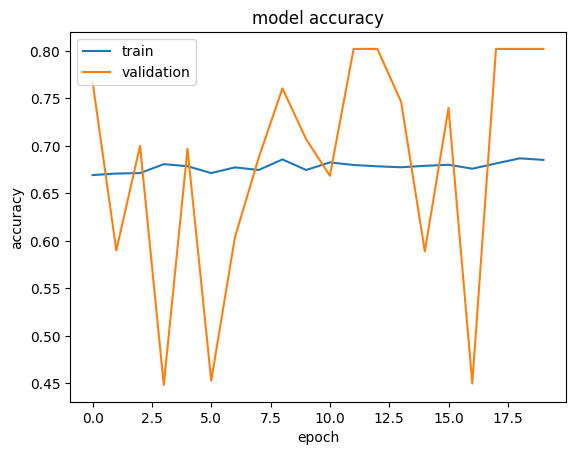

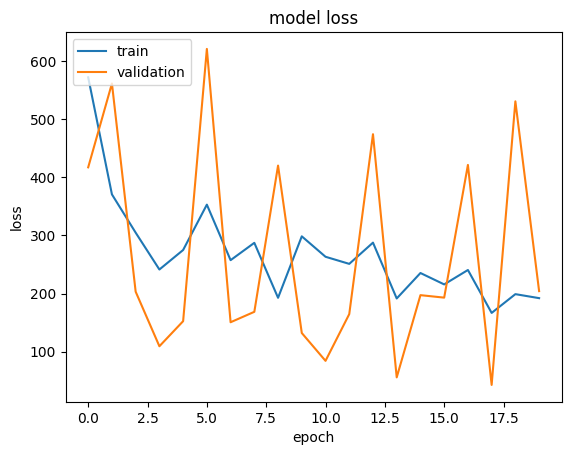

In [62]:
#  "Accuracy Plot"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

> **It's possible to see a lot of fluctuations in Accuracy Graph, which concludes model learning is unstable.**

A well trained model would have training and validation accuracy going to gradually as epochs progress.

The last graph seems okay as they are decreasing gradually.

In [63]:
# Generate predictions on testing set (0/1)
predictions = np.round(model.predict(Xtest))

63/63 [==============================] - 0s 1ms/step


In [64]:
# Check Accuracy

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
accuracy_score(Ytest , predictions) 

0.802

> **Accuracy seems good.**

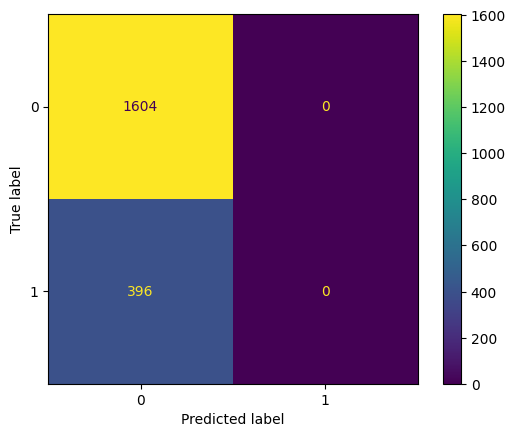

In [65]:
ConfusionMatrixDisplay.from_predictions(Ytest, predictions)

The model is making incorrect predictions (everything=0).

- _This is a common problem with imbalanced dataset where one class is very dominant over another._

In [66]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [67]:
from sklearn.metrics import classification_report 

print(classification_report(Ytest , predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1604
           1       0.00      0.00      0.00       396

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.64      0.80      0.71      2000



c:\Users\alina\Documents\Python-Projects\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alina\Documents\Python-Projects\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alina\Documents\Python-Projects\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

#### **Improving this Neural Network**

Improvements:

1. Add in Class weights to handle imbalance.
2. Increase Units in Dense Layers and also increase number of layers.
3. Add BatchNormalization to layers.
4. Add Dropout after Layers.

In [68]:
# same data used before and sets for training and tests
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [69]:
X = data.iloc[: , :-1].values.astype(np.float32)
Y = data.iloc[: , -1].values.astype(int)

In [70]:
# Split these two sets into training and testing sets (80% train and 20% test)
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [71]:
# Add class weights when Data is Imbalanced 
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight = 'balanced' ,  classes = np.unique(Ytrain), y=Ytrain)

model_class_weights = {}
for e , weight in enumerate(class_weights):
    model_class_weights[e] = weight

In [72]:
model_class_weights

{0: 0.6290297216543481, 1: 2.437538086532602}

In [73]:
# Add in Class weights to handle Imbalance 
# Increase neurons in Dense layers and Also Increase Number of Layers 
# Add BatchNormalization to Layers 
# Add Dropout after Layers 

model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(10,)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# print summary to undertstand the neural network flow
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 128)               1408      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_7 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)               

> It has significantly higher parameters to train compared to the previous model.

- **Trainable params**: 1441 (previous model) vs. 12181 (this new model)

In [74]:
# Create the optimizer and compile the model
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [75]:
# Fitting the model to the data and passing the class weights as argument
history = model.fit(Xtrain , Ytrain , validation_data=(Xtest , Ytest) , epochs=20 , class_weight=model_class_weights)

Epoch 1/20


250/250 [==============================] - 3s 4ms/step - loss: 0.6206 - accuracy: 0.6582 - val_loss: 0.6146 - val_accuracy: 0.6375
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5422 - accuracy: 0.7122 - val_loss: 0.5423 - val_accuracy: 0.7140
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5185 - accuracy: 0.7364 - val_loss: 0.4526 - val_accuracy: 0.7915
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5149 - accuracy: 0.7445 - val_loss: 0.4887 - val_accuracy: 0.7410
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5027 - accuracy: 0.7486 - val_loss: 0.4683 - val_accuracy: 0.7795
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4980 - accuracy: 0.7592 - val_loss: 0.4849 - val_accuracy: 0.7740
Epoch 7/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4945 - accuracy: 0.7613 - val_loss: 0.4541 - val_accuracy: 0.7880
Epoch 8/20
250/25

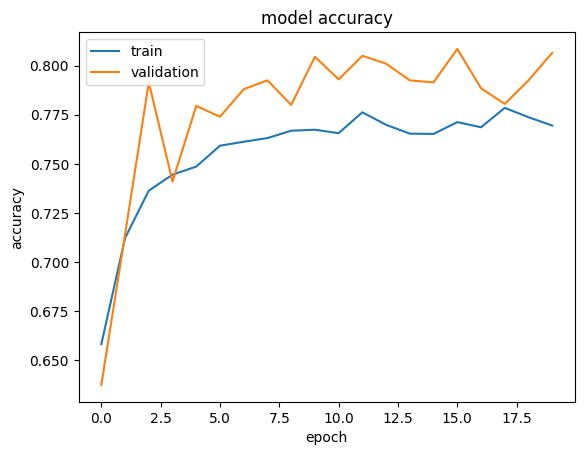

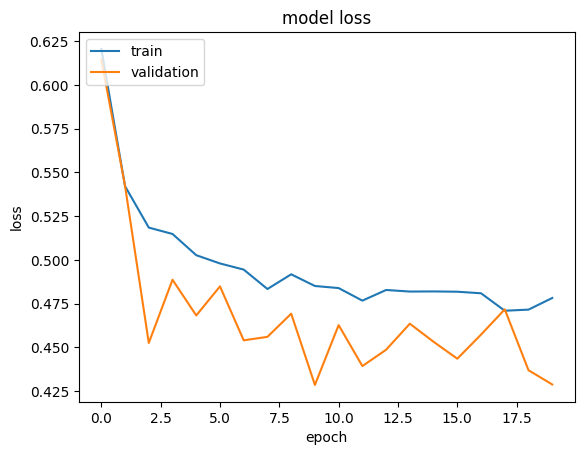

In [76]:
#  "Accuracy Plot"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

> **Now, it's possible to see graphs converging better compared to previous implementation.**

Both the training and validation accuracies are gradually increasing. Similarly, **the loss kept decreasing with the number of epochs**. This means that the model has trained quite well. 

In [77]:
# Generate predictions on testing set (0/1)
predictions = np.round(model.predict(Xtest))

63/63 [==============================] - 0s 1ms/step


In [78]:
# Check Accuracy

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

accuracy_score(Ytest , predictions) 

0.8065

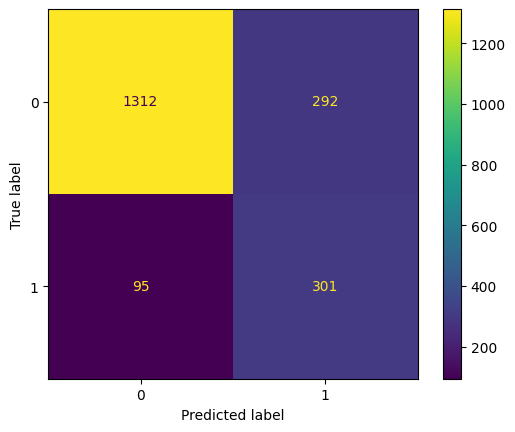

In [79]:
ConfusionMatrixDisplay.from_predictions(Ytest, predictions)

> It's predicting one label much better than previous.

The current model has overcome imbalanced data issue.

In [80]:
from sklearn.metrics import classification_report 

print(classification_report(Ytest , predictions))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1604
           1       0.51      0.76      0.61       396

    accuracy                           0.81      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.85      0.81      0.82      2000



The recall value for class one is good, but the precision is something that should be handled in a better way to be improved.